# Otimização baseada no gradiente

Algoritmos de redes neurais envolvem otimização utilizando o vetor gradiente. Podemos otimizar (minimizar) uma função f(x) (denominada função de custo) utilizando sua derivada $f'(x)$.

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

### Definição da função e sua derivada

A função que estamos otimizando é:

$f(x) = x^2$

Sua derivada (ou gradiente), usada no gradiente descendente, é:

$f'(x) = 2x$

In [11]:
def f(x):
    return x**2

def fl(x):
    return 2*x

### Geração de dados para gráfico

Criamos um intervalo de valores de x de -10 a 10 (passo de 0.1) e calculamos os valores correspondentes de 
$f(x) = x²$.

- Taxa de aprendizado: $\alpha = 0{,}1$
- Ponto inicial para o gradiente descendente: $x_0 = -10$

In [12]:
x = np.arange(-10, 10, 0.1)
y = f(x)
lr = 0.1 # learning rate
point =  -10 # ponto inicial

print('f(x) =', f(point))

f(x) = 100


A cada iteração aplicamos:

$x_{\text{novo}} = x_{\text{atual}} - \alpha \cdot f'(x_{\text{atual}})$

Nesse exemplo:
- Começamos com $ x = -10 $
- Usamos taxa de aprendizado $alpha = 0{,}1$
- Executamos 2 passos do gradiente descendente

Cada ponto preto no gráfico mostra uma iteração da otimização se aproximando do mínimo global em $x = 0$.

26.2144 -10.24
16.777216 -8.192


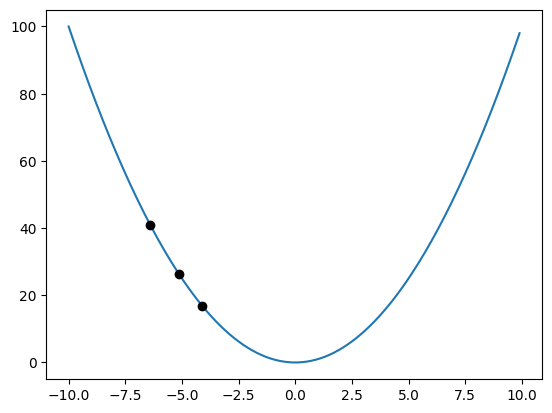

In [14]:
plt.plot(x,y)
plt.plot(point, f(point), 'o', color = 'black')

for k in range(2):

    new_point = point - lr * fl(point)

    plt.plot(new_point, f(new_point), 'o', color = 'black')

    point = new_point
    print(f(point), fl(point))

### Gradiente em funções multivariadas

Em uma rede neural artificial, geralmente otimizamos uma função:

$f: \mathbb{R}^n \rightarrow \mathbb{R}$

Para minimizar essa função, atualizamos iterativamente um vetor de parâmetros $\vec{x}$ com:

$\vec{x} = \vec{x} - \epsilon \cdot \nabla_{\vec{x}} f(\vec{x})$

Onde:
- $\epsilon$ é a **taxa de aprendizado**,
- $\nabla_{\vec{x}} f(\vec{x})$ é o **gradiente** da função com relação a $\vec{x}$.

Como exemplo, considere a função:

$f(x, y) = x^2 + y^2$

Essa função tem um mínimo global em $(0, 0)$, e seu gradiente é:

$\nabla f(x, y) = \begin{bmatrix} 2x \\ 2y \end{bmatrix}$


In [5]:
def g(x, y):
    return x**2 + y**2

def gx(x, y):
    return 2*x

def gy(x, y):
    return 2*y

---

### Visualização da função $f(x, y) = x^2 + y^2$

Criamos uma malha 2D com `np.meshgrid` para avaliar a função em vários pontos do plano $(x, y)$.

O resultado $Z = f(X, Y)$ será usado para plotar a superfície ou os contornos da função, permitindo visualizar o formato parabólico e o ponto de mínimo global em $(0, 0)$.


In [15]:
X = np.arange(-10, 10)
Y = np.arange(-10, 10)
X, Y = np.meshgrid(X, Y)
Z = g(X,Y)

[-9, -9] 162
[-7.2, -7.2] 103.68
[-5.76, -5.76] 66.3552
[-4.608, -4.608] 42.467327999999995
[-3.6864, -3.6864] 27.17908992
[-2.9491199999999997, -2.9491199999999997] 17.394617548799996
[-2.3592959999999996, -2.3592959999999996] 11.132555231231997
[-1.8874367999999997, -1.8874367999999997] 7.124835347988478
[-1.5099494399999998, -1.5099494399999998] 4.559894622712625
[-1.2079595519999997, -1.2079595519999997] 2.91833255853608
[-0.9663676415999998, -0.9663676415999998] 1.8677328374630913
[-0.7730941132799998, -0.7730941132799998] 1.1953490159763782
[-0.6184752906239999, -0.6184752906239999] 0.7650233702248822
[-0.4947802324991999, -0.4947802324991999] 0.4896149569439246
[-0.3958241859993599, -0.3958241859993599] 0.31335357244411177
[-0.3166593487994879, -0.3166593487994879] 0.20054628636423152
[-0.25332747903959035, -0.25332747903959035] 0.12834962327310817
[-0.20266198323167228, -0.20266198323167228] 0.08214375889478924
[-0.16212958658533783, -0.16212958658533783] 0.05257200569266511
[-

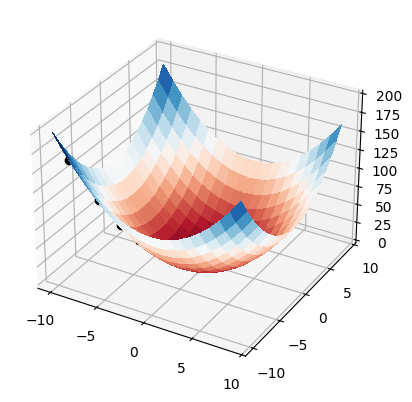

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

point = [-9, -9]
print(point, g(point[0], point[1]))
plt.plot([point[0]],[point[1]],[g(point[0], point[1])], 'o', color = 'black')

for k in range(40):
    grad = [gx(point[0], point[1]), gy(point[0], point[1])] # vetor gradiente
    point = [point[0] - lr * grad[0] , point[1] - lr * grad[1]] # x - lr * gradiente
    plt.plot([point[0]],[point[1]],[g(point[0], point[1])], 'o', color = 'black')
    print(point, g(point[0], point[1]))

plt.show()

## Exercício

1. O que ocorre durante a otimização com gradiente ao encontrar um ponto de cela? E um mínimo local?
2. Altere a função f para que possua mínimos locais. Inicialize o algoritmo de otimização em um ponto para demonstrar o que ocorre neste caso.
3. Altere a função g para que possua pontos de cela. Inicialize o algoritmo de otimização em um ponto para demonstrar o que ocorre neste caso.
4. Como podemos determinar a convergência do gradiente descendente?

---

#### Questão 1. 

**Ponto de cela**: o gradiente é zero, mas não é mínimo nem máximo. O gradiente descendente pode estagnar ou andar lentamente, dependendo da direção do gradiente.

**Mínimo local**: o algoritmo converge e para nesse ponto, mesmo que não seja o melhor possível (mínimo global).

---

#### Questão 2. 

In [18]:
# Função com mínimos locais: exemplo clássico do coseno
def f(x):
    return np.cos(x) + x**2 / 10

def fl(x):
    return -np.sin(x) + (2*x)/10

Iteração 0: x = -3.8443, f(x) = 0.7148
Iteração 1: x = -3.7028, f(x) = 0.5245
Iteração 2: x = -3.5755, f(x) = 0.3711
Iteração 3: x = -3.4620, f(x) = 0.2494
Iteração 4: x = -3.3612, f(x) = 0.1538
Iteração 5: x = -3.2722, f(x) = 0.0793
Iteração 6: x = -3.1938, f(x) = 0.0214
Iteração 7: x = -3.1247, f(x) = -0.0235
Iteração 8: x = -3.0639, f(x) = -0.0583
Iteração 9: x = -3.0104, f(x) = -0.0852


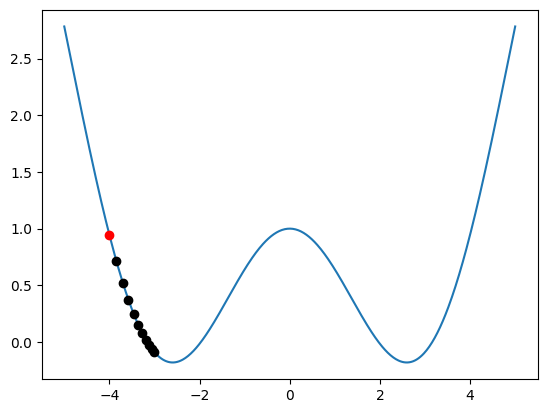

In [19]:
x = np.linspace(-5, 5, 500)
y = f(x)

plt.plot(x, y)

point = -4  # ponto inicial
lr = 0.1

plt.plot(point, f(point), 'o', color='red')

for i in range(10):
    point = point - lr * fl(point)
    plt.plot(point, f(point), 'o', color='black')
    print(f"Iteração {i}: x = {point:.4f}, f(x) = {f(point):.4f}")


---

#### Questão 3. 

In [20]:
def g(x, y):
    return x**2 - y**2  # ponto de cela em (0, 0)

def gx(x, y):
    return 2*x

def gy(x, y):
    return -2*y

In [22]:
x, y = 0.5, 0.5
lr = 0.1
trajectory = [(x, y)]

for i in range(10):
    x = x - lr * gx(x, y)
    y = y - lr * gy(x, y)
    trajectory.append((x, y))
    print(f"Iteração {i}: (x, y) = ({x:.4f}, {y:.4f}), g(x, y) = {g(x, y):.4f}")

Iteração 0: (x, y) = (0.4000, 0.6000), g(x, y) = -0.2000
Iteração 1: (x, y) = (0.3200, 0.7200), g(x, y) = -0.4160
Iteração 2: (x, y) = (0.2560, 0.8640), g(x, y) = -0.6810
Iteração 3: (x, y) = (0.2048, 1.0368), g(x, y) = -1.0330
Iteração 4: (x, y) = (0.1638, 1.2442), g(x, y) = -1.5211
Iteração 5: (x, y) = (0.1311, 1.4930), g(x, y) = -2.2118
Iteração 6: (x, y) = (0.1049, 1.7916), g(x, y) = -3.1988
Iteração 7: (x, y) = (0.0839, 2.1499), g(x, y) = -4.6151
Iteração 8: (x, y) = (0.0671, 2.5799), g(x, y) = -6.6513
Iteração 9: (x, y) = (0.0537, 3.0959), g(x, y) = -9.5815


---

#### Questão 4. Podemos determinar a convergência do gradiente descendente quando:
   - $\|\nabla f(x)\|$ é próximo de zero;
   - A mudança em $f(x)$ entre iterações é pequena;
   - A mudança em $x$ é pequena;
   - Um número máximo de iterações é atingido.

---

## Leitura recomendada

[Seção 4.3.](http://www.deeplearningbook.org/contents/numerical.html) Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. Deep learning. MIT press, 2016.